In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

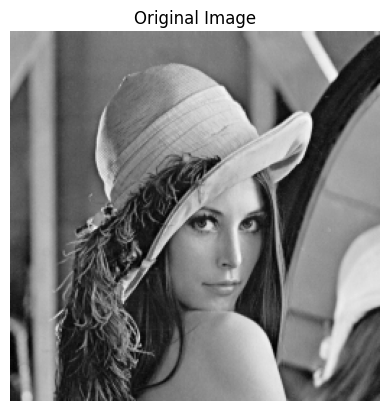

In [36]:
image_rgb = cv2.imread("Downloads/Lenna_(test_image).png")


if image_rgb is None:
    raise ValueError("Image not found! Check the path.")


image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)


image_gray = cv2.resize(image_gray, (256, 256))

plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

In [11]:

def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape)
    return np.clip(image + noise, 0, 255).astype(np.uint8)

def add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    salt_coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    pepper_coords = [np.random.randint(0, i, num_pepper) for i in image.shape]

    noisy_image[salt_coords[0], salt_coords[1]] = 255
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    return noisy_image

def add_uniform_noise(image, low=-30, high=30):
    noise = np.random.uniform(low, high, image.shape)
    return np.clip(image + noise, 0, 255).astype(np.uint8)

def add_gamma_noise(image, shape=2.0, scale=25):
    noise = np.random.gamma(shape, scale, image.shape)
    return np.clip(image + noise, 0, 255).astype(np.uint8)

def add_exponential_noise(image, scale=25):
    noise = np.random.exponential(scale, image.shape)
    return np.clip(image + noise, 0, 255).astype(np.uint8)

def arithmetic_mean_filter(image):
    return cv2.blur(image, (3,3))

def geometric_mean_filter(image):
    img_float = image.astype(np.float32)
    img_float[img_float == 0] = 1
    log_image = np.log(img_float)
    return np.exp(cv2.blur(log_image, (3,3))).astype(np.uint8)

def harmonic_mean_filter(image):
    img_float = image.astype(np.float32)
    img_float[img_float == 0] = 1
    return (3*3) / cv2.blur(1.0 / img_float, (3,3))

def contraharmonic_mean_filter(image, Q=1.5):
    img_float = image.astype(np.float32)
    num = cv2.blur(img_float**(Q+1), (3,3))
    denom = cv2.blur(img_float**Q, (3,3)) + 1e-8
    return (num / denom).astype(np.uint8)

def adaptive_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)


def min_filter(image):
    kernel = np.ones((3, 3), np.uint8)
    return cv2.erode(image, kernel)

def max_filter(image):
    kernel = np.ones((3, 3), np.uint8)
    return cv2.dilate(image, kernel)


***Gaussian Noise***

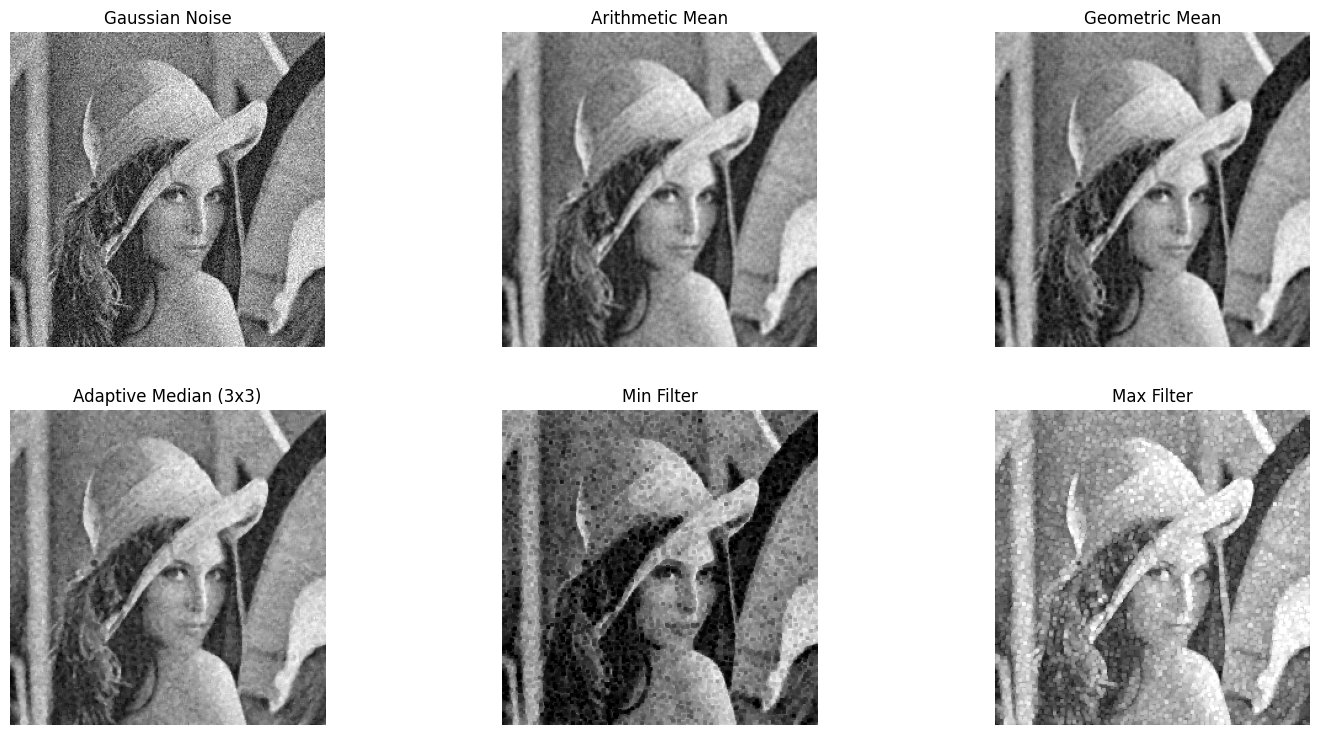

In [31]:

noisy_img = add_gaussian_noise(image_gray)


arithmetic_mean_filtered = arithmetic_mean_filter(noisy_img)
geometric_mean_filtered = geometric_mean_filter(noisy_img)
adaptive_median_filtered = adaptive_median_filter(noisy_img, 3)
min_filtered = min_filter(noisy_img)
max_filtered = max_filter(noisy_img)


fig, axes = plt.subplots(2, 3, figsize=(18, 9))
axes = axes.flatten()
axes[0].imshow(noisy_img, cmap='gray')
axes[0].set_title("Gaussian Noise")

filters = [arithmetic_mean_filtered, geometric_mean_filtered, adaptive_median_filtered, min_filtered, max_filtered]
titles = ["Arithmetic Mean", "Geometric Mean", "Adaptive Median (3x3)", "Min Filter", "Max Filter"]

for i in range(5):
    axes[i+1].imshow(filters[i], cmap='gray')
    axes[i+1].set_title(titles[i])

for ax in axes:
    ax.axis("off")

plt.show()




***Salt & Pepper Noise***

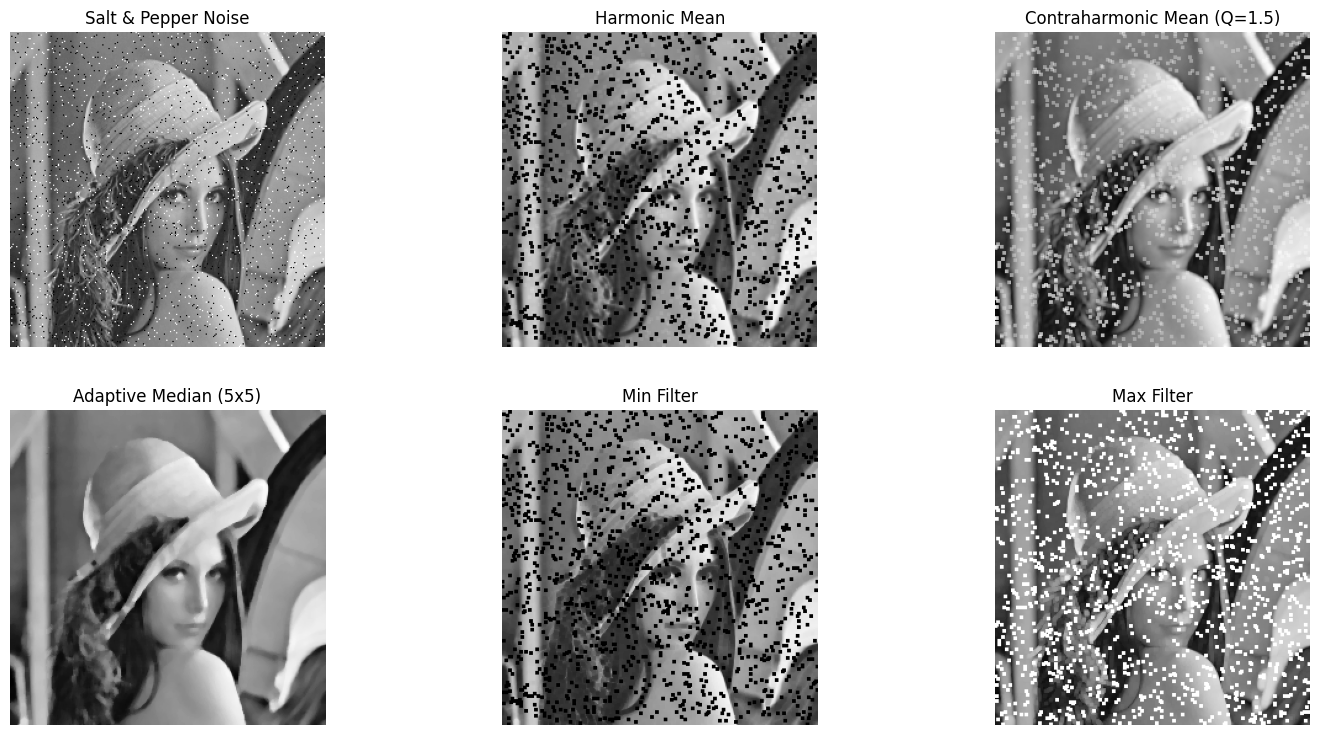

In [32]:

noisy_img = add_salt_pepper_noise(image_gray)


harmonic_mean_filtered = harmonic_mean_filter(noisy_img)
contraharmonic_mean_filtered = contraharmonic_mean_filter(noisy_img, Q=1.5)
adaptive_median_filtered = adaptive_median_filter(noisy_img, 5)
min_filtered = min_filter(noisy_img)
max_filtered = max_filter(noisy_img)


fig, axes = plt.subplots(2,3, figsize=(18, 9))
axes = axes.flatten()
axes[0].imshow(noisy_img, cmap='gray')
axes[0].set_title("Salt & Pepper Noise")

filters = [harmonic_mean_filtered, contraharmonic_mean_filtered, adaptive_median_filtered, min_filtered, max_filtered]
titles = ["Harmonic Mean", "Contraharmonic Mean (Q=1.5)", "Adaptive Median (5x5)", "Min Filter", "Max Filter"]

for i in range(5):
    axes[i+1].imshow(filters[i], cmap='gray')
    axes[i+1].set_title(titles[i])

for ax in axes:
    ax.axis("off")

plt.show()


***Uniform Noise***

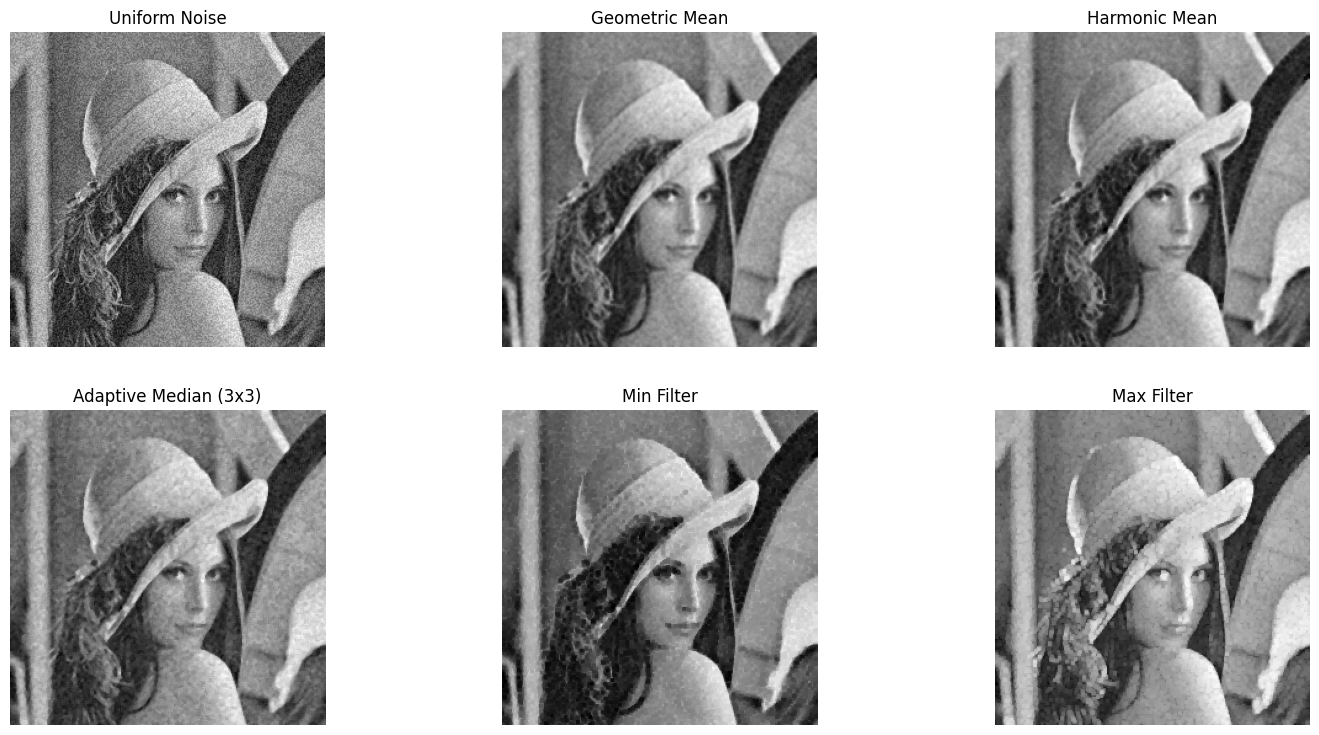

In [33]:

noisy_img = add_uniform_noise(image_gray)


geometric_mean_filtered = geometric_mean_filter(noisy_img)
harmonic_mean_filtered = harmonic_mean_filter(noisy_img)
adaptive_median_filtered = adaptive_median_filter(noisy_img, 3)
min_filtered = min_filter(noisy_img)
max_filtered = max_filter(noisy_img)


fig, axes = plt.subplots(2,3, figsize=(18, 9))
axes = axes.flatten()
axes[0].imshow(noisy_img, cmap='gray')
axes[0].set_title("Uniform Noise")

filters = [geometric_mean_filtered, harmonic_mean_filtered, adaptive_median_filtered, min_filtered, max_filtered]
titles = ["Geometric Mean", "Harmonic Mean", "Adaptive Median (3x3)", "Min Filter", "Max Filter"]

for i in range(5):
    axes[i+1].imshow(filters[i], cmap='gray')
    axes[i+1].set_title(titles[i])

for ax in axes:
    ax.axis("off")

plt.show()


***Gamma Noise***

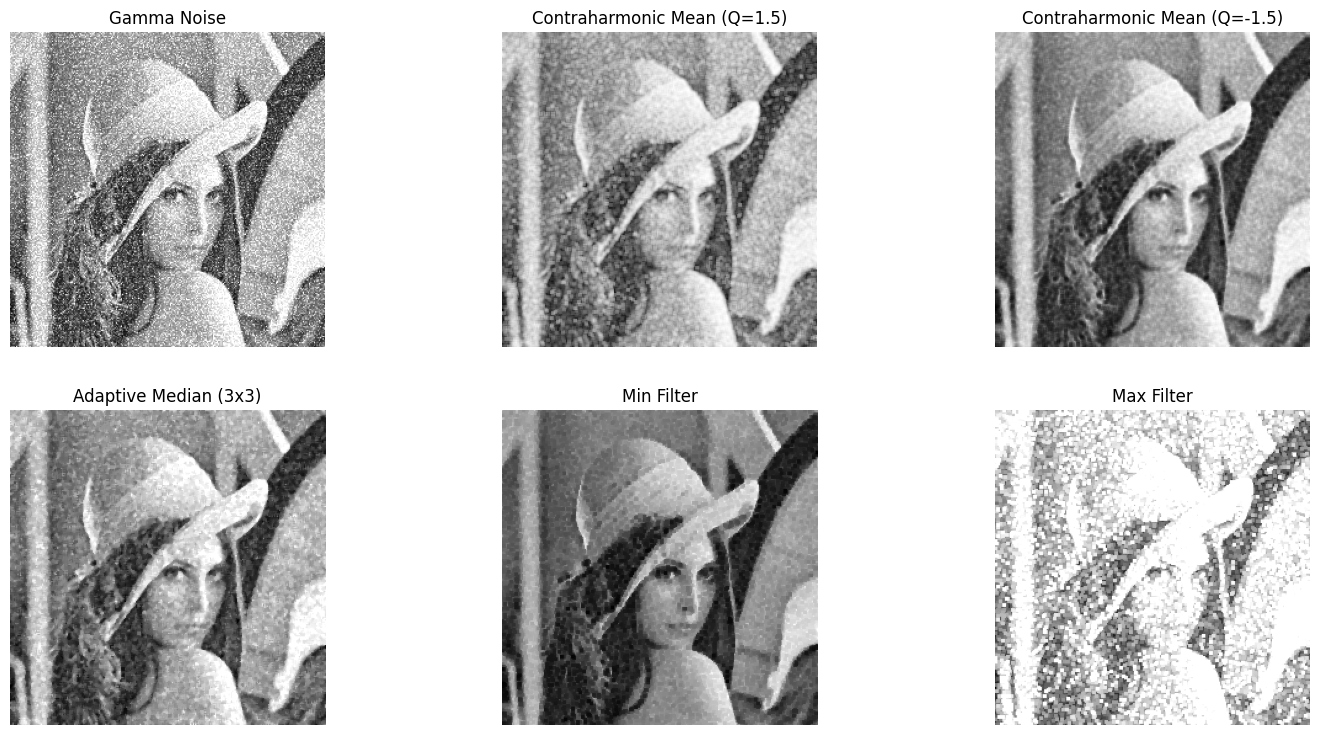

In [34]:

noisy_img = add_gamma_noise(image_gray)


contraharmonic_mean_filtered_q1 = contraharmonic_mean_filter(noisy_img, Q=1.5)
contraharmonic_mean_filtered_q2 = contraharmonic_mean_filter(noisy_img, Q=-1.5)
adaptive_median_filtered = adaptive_median_filter(noisy_img, 3)
min_filtered = min_filter(noisy_img)
max_filtered = max_filter(noisy_img)


fig, axes = plt.subplots(2,3, figsize=(18, 9))
axes = axes.flatten()
axes[0].imshow(noisy_img, cmap='gray')
axes[0].set_title("Gamma Noise")

filters = [contraharmonic_mean_filtered_q1, contraharmonic_mean_filtered_q2, adaptive_median_filtered, min_filtered, max_filtered]
titles = ["Contraharmonic Mean (Q=1.5)", "Contraharmonic Mean (Q=-1.5)", "Adaptive Median (3x3)", "Min Filter", "Max Filter"]

for i in range(5):
    axes[i+1].imshow(filters[i], cmap='gray')
    axes[i+1].set_title(titles[i])

for ax in axes:
    ax.axis("off")

plt.show()


***Exponential Noise***

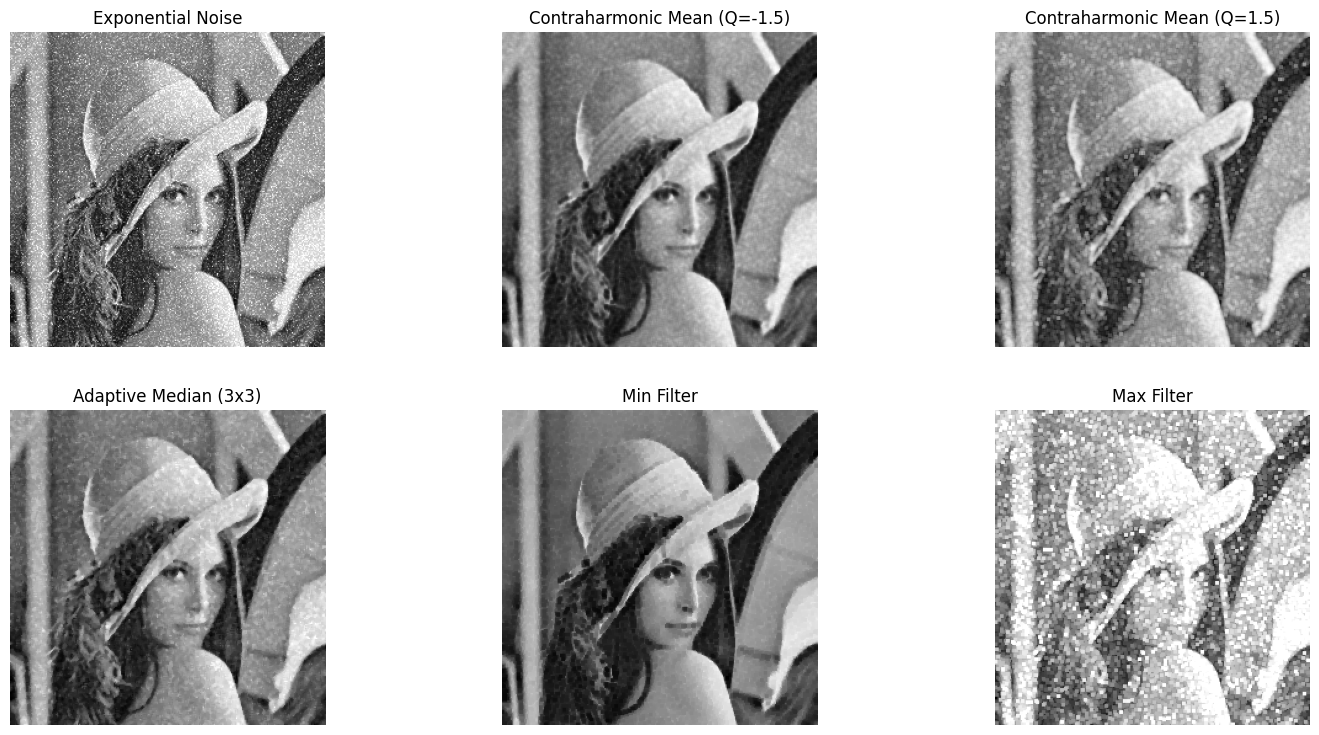

In [39]:

noisy_img = add_exponential_noise(image_gray)


contraharmonic_mean_filtered_q_neg1 = contraharmonic_mean_filter(noisy_img, Q=-1.5)
contraharmonic_mean_filtered_q_neg2 = contraharmonic_mean_filter(noisy_img, Q=1.5)
adaptive_median_filtered = adaptive_median_filter(noisy_img, 3)
min_filtered = min_filter(noisy_img)
max_filtered = max_filter(noisy_img)


fig, axes = plt.subplots(2,3, figsize=(18, 9))
axes = axes.flatten()
axes[0].imshow(noisy_img, cmap='gray')
axes[0].set_title("Exponential Noise")

filters = [contraharmonic_mean_filtered_q_neg1, contraharmonic_mean_filtered_q_neg2, adaptive_median_filtered, min_filtered, max_filtered]
titles = ["Contraharmonic Mean (Q=-1.5)", "Contraharmonic Mean (Q=1.5)", "Adaptive Median (3x3)", "Min Filter", "Max Filter"]

for i in range(5):
    axes[i+1].imshow(filters[i], cmap='gray')
    axes[i+1].set_title(titles[i])

for ax in axes:
    ax.axis("off")

plt.show()


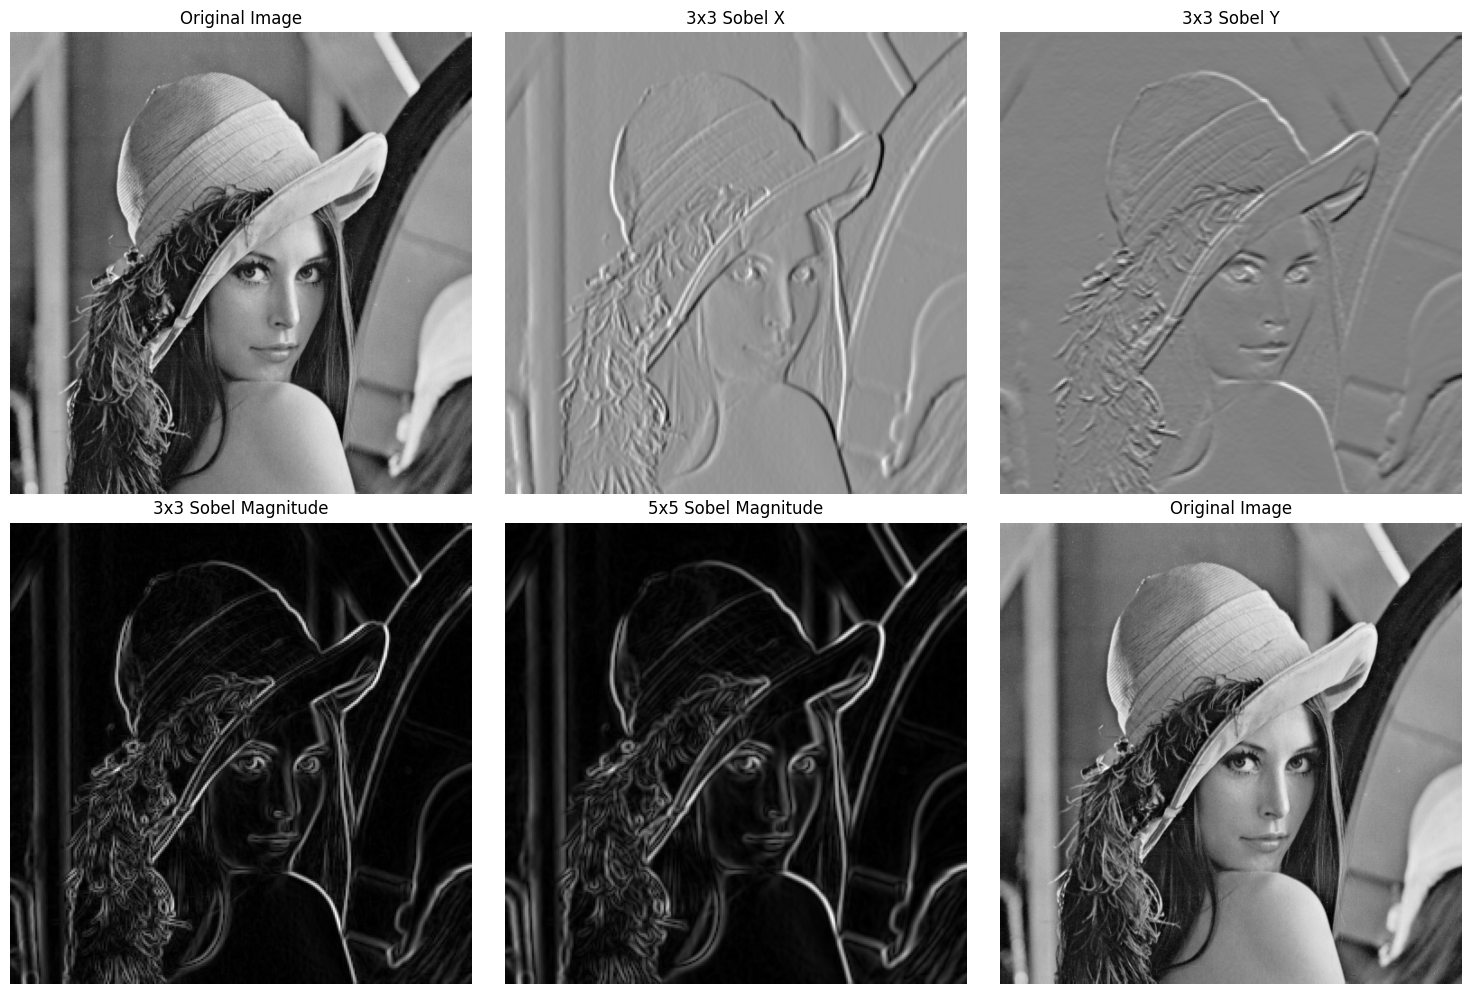

In [42]:

def manual_convolution(image, kernel):
  
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')
    
   
    output = np.zeros_like(image, dtype=np.float32)
    
   
    for i in range(img_height):
        for j in range(img_width):
         
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            
            output[i, j] = np.sum(region * kernel)
            
    return output

def manual_sobel(image, kernel_size=3):

    if kernel_size == 3:
       
        sobel_x = np.array([
            [-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]
        ])
        
        sobel_y = np.array([
            [-1, -2, -1],
            [0, 0, 0],
            [1, 2, 1]
        ])
    
    elif kernel_size == 5:
      
        sobel_x = np.array([
            [-1, -2, 0, 2, 1],
            [-4, -8, 0, 8, 4],
            [-6, -12, 0, 12, 6],
            [-4, -8, 0, 8, 4],
            [-1, -2, 0, 2, 1]
        ])
        
        sobel_y = np.array([
            [-1, -4, -6, -4, -1],
            [-2, -8, -12, -8, -2],
            [0, 0, 0, 0, 0],
            [2, 8, 12, 8, 2],
            [1, 4, 6, 4, 1]
        ])
    else:
        raise ValueError("Only kernel sizes 3 and 5 are supported")
    

    grad_x = manual_convolution(image, sobel_x)
    grad_y = manual_convolution(image, sobel_y)
    

    magnitude = np.sqrt(grad_x**2 + grad_y**2)

    magnitude = np.uint8(magnitude * 255 / magnitude.max())
    
    return magnitude, grad_x, grad_y



magnitude_3x3, grad_x_3x3, grad_y_3x3 = manual_sobel(image_gray, kernel_size=3)
magnitude_5x5, grad_x_5x5, grad_y_5x5 = manual_sobel(image_gray, kernel_size=5)


plt.figure(figsize=(15, 10))


plt.subplot(231)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')


plt.subplot(232)
plt.imshow(grad_x_3x3, cmap='gray')
plt.title('3x3 Sobel X')
plt.axis('off')

plt.subplot(233)
plt.imshow(grad_y_3x3, cmap='gray')
plt.title('3x3 Sobel Y')
plt.axis('off')


plt.subplot(234)
plt.imshow(magnitude_3x3, cmap='gray')
plt.title('3x3 Sobel Magnitude')
plt.axis('off')

plt.subplot(235)
plt.imshow(magnitude_5x5, cmap='gray')
plt.title('5x5 Sobel Magnitude')
plt.axis('off')

plt.subplot(236)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()